In [1]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

from base import supres
from exputils import *

C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load data

In [2]:
dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
# dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

supports = read_tsv('featured.tsv')

In [8]:
window_sizes = [4]
shifts = [1, 2, 3]

DAY = 48
max_hold_time = 5 * DAY
stop_loss = 0.05
fee = 0.0025

# Split

In [6]:
train = supports.query('date < "2018"')
test = supports.query('date >= "2018"')

C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


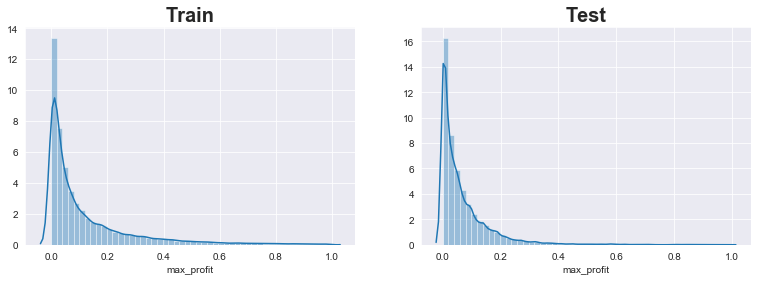

In [27]:
def plot_bucketed(df, ax, title):
    bucketed = (df['max_profit'] * 100).apply(int) / 100
    sns.distplot(bucketed[bucketed < 1], ax=ax)
    ax.set_title(title, fontproperties=title_font)

f, axes = plt.subplots(1, 2, figsize=[13, 4])
plot_bucketed(train, axes[0], 'Train')
plot_bucketed(test, axes[1], 'Test')

In [28]:
write_tsv(train, 'train.tsv')
write_tsv(test, 'test.tsv')